In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from predict import Predict
from time import time
from tqdm import tqdm
import pickle
import joblib

/usr/local/lib/python3.10/dist-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [1]:
model = 'rf'
dist = 'dtw'
mode = 'kmedoids'

total_result = {}
exp_list = [(infer, predict) for infer in ['water', 'gas', 'hotwater'] for predict in ['elec', 'water', 'gas', 'hotwater'] if infer != predict]
for infer, predict in tqdm(exp_list):
    if infer == predict:
        continue
    name = infer + '_' + predict
    start = time()
    pr = Predict(infer, predict)
    result = pr.predict(model=model, dist, mode)
    total_result[name] = result
    print(name, end='')
    print(f': {time()-start:.2f} seconds')
with open(f'exp_result/{mode}/{model}.pkl', 'wb') as f:
    pickle.dump(total_result, f)

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject
 11%|█         | 1/9 [08:17<1:06:18, 497.31s/it]

            4종 유추    4종 랜덤    4종 실제       3종
Week 1~4  121.185  124.427   121.19  120.623
Week 2~5  113.143  116.891  113.355  112.634
Week 3~6  110.126  114.564   110.23   109.61
Week 4~7  126.776  131.817  126.818  126.336
Week 5~8  119.698  123.814  119.577  119.085
water_elec: 497.31 seconds



 22%|██▏       | 2/9 [16:34<57:59, 497.03s/it]  

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  1.526  1.771  1.528  1.509
Week 2~5   1.03  1.424  1.074   1.04
Week 3~6  0.867  0.877  0.822  0.752
Week 4~7  3.104  3.446  3.098    3.1
Week 5~8  1.463  1.732  1.464  1.382
water_gas: 496.84 seconds



 33%|███▎      | 3/9 [24:49<49:38, 496.42s/it]

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  2.125  2.106  2.241  1.983
Week 2~5  1.317  1.368  1.318  1.294
Week 3~6  1.665  1.652  1.683  1.644
Week 4~7  1.967  2.448  2.036   2.03
Week 5~8  1.319  1.912   1.31  1.351
water_hotwater: 495.68 seconds



 44%|████▍     | 4/9 [32:57<41:05, 493.10s/it]

            4종 유추    4종 랜덤    4종 실제       3종
Week 1~4  121.319  125.839   121.19  121.652
Week 2~5  113.417  117.878  113.355  113.916
Week 3~6   110.33  115.161   110.23  110.787
Week 4~7  127.707  130.734  126.818  126.331
Week 5~8  119.993  124.401  119.577  119.648
gas_elec: 488.02 seconds



 56%|█████▌    | 5/9 [41:02<32:40, 490.08s/it]

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  3.704  3.947  3.831  3.804
Week 2~5  3.408  3.843  3.431  3.406
Week 3~6  3.269  3.554  3.305  3.263
Week 4~7  5.924  5.963  5.649  5.305
Week 5~8  2.752  3.098  2.619   2.59
gas_water: 484.73 seconds



 67%|██████▋   | 6/9 [49:08<24:25, 488.66s/it]

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  2.312  2.449  2.241  2.271
Week 2~5  1.262  1.424  1.318  1.301
Week 3~6  1.691  1.836  1.683  1.739
Week 4~7  2.234  2.081  2.036  1.819
Week 5~8  1.331  1.584   1.31  1.347
gas_hotwater: 485.90 seconds



 78%|███████▊  | 7/9 [57:12<16:14, 487.27s/it]

            4종 유추    4종 랜덤    4종 실제       3종
Week 1~4  121.385  125.271   121.19  121.228
Week 2~5  113.558  117.006  113.355   113.48
Week 3~6  110.446  114.447   110.23  110.311
Week 4~7  127.416  131.417  126.818  127.284
Week 5~8  120.053  124.052  119.577   119.79
hotwater_elec: 484.41 seconds



 89%|████████▉ | 8/9 [1:05:11<08:04, 484.64s/it]

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  1.349  1.796  1.528  1.535
Week 2~5  1.105  1.437  1.074  1.117
Week 3~6  0.826  1.416  0.822  0.844
Week 4~7  3.135  3.244  3.098  3.212
Week 5~8  1.527   1.98  1.464  1.548
hotwater_water: 478.99 seconds


100%|██████████| 9/9 [1:12:59<00:00, 486.59s/it]

          4종 유추  4종 랜덤  4종 실제     3종
Week 1~4  3.842   3.87  3.831  3.915
Week 2~5  3.463  4.306  3.431  3.516
Week 3~6  3.304  3.751  3.305  3.316
Week 4~7  5.839  6.236  5.649  5.938
Week 5~8  2.729  2.839  2.619   2.64
hotwater_gas: 467.37 seconds


In [49]:
exp_list_list = []
for exp in ['rf','xgb']:
    exp_list = []
    for i in range(5):
        with open(f'exp_result/kmeans/{exp}/exp_{i}.pkl', 'rb') as f:
            loaded_object = pickle.load(f)
            exp_list.append(loaded_object)
    exp_list_list.append(exp_list)

In [106]:
import joblib
df = joblib.load('/workspace/AMI/InferProj/exp_result/kmedoids/rf/exp_1.pkl')

In [17]:
from dtaidistance import dtw
import numpy as np
random_array = np.random.rand(1000, 500)
ds = dtw.distance_matrix_fast(random_array)
print(ds)

[[0.         4.10365992 4.0353671  ... 4.00208172 3.97101901 4.08727007]
 [4.10365992 0.         3.91680661 ... 4.07291533 4.03322809 4.00789549]
 [4.0353671  3.91680661 0.         ... 3.92990908 3.88000707 3.84809519]
 ...
 [4.00208172 4.07291533 3.92990908 ... 0.         4.02459473 3.8802532 ]
 [3.97101901 4.03322809 3.88000707 ... 4.02459473 0.         3.93858277]
 [4.08727007 4.00789549 3.84809519 ... 3.8802532  3.93858277 0.        ]]


In [53]:
ran1 = np.random.rand(500, 1000)
ran2 = np.random.rand(500, 1000)

In [47]:
ran1.reshape(1000,-1,1)

array([[[0.36038184, 0.55631753]],

       [[0.80701597, 0.84388004]],

       [[0.68776974, 0.13758372]]])

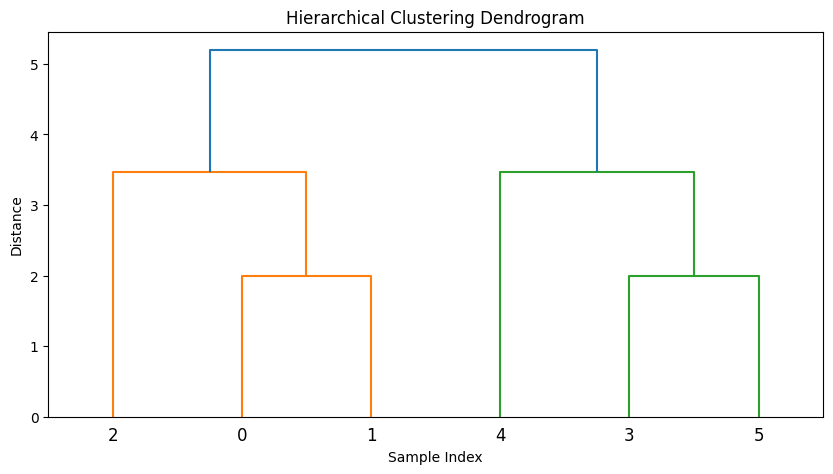

클러스터 레이블: [1 1 1 2 2 2]


In [68]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# 샘플 데이터 생성
data = [[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]]

# 계층적 클러스터링 수행
Z = linkage(data, method='ward')

# 덴드로그램 그리기
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# 클러스터 레이블 출력
k = 2  # 클러스터 수 지정
labels = fcluster(Z, k, criterion='maxclust')
print("클러스터 레이블:", labels)

In [73]:
with open('/root/workspace/AMI/InferProj/exp_result/kmeans/rf/exp_0.pkl', 'rb') as f:
    df = pickle.load(f)
df

{'water_elec':            4종 유추   4종 랜덤   4종 실제      3종
 Week 1~4  31.422  36.192  33.409  34.233
 Week 2~5  28.555  29.335  30.281  28.876
 Week 3~6   27.37  28.858  28.164   29.12
 Week 4~7  34.011  31.248   30.67  30.651
 Week 5~8  27.768  26.678  31.398  28.486,
 'water_gas':           4종 유추  4종 랜덤  4종 실제     3종
 Week 1~4  1.086  1.252   1.21  1.171
 Week 2~5  0.895  0.976  0.917  0.883
 Week 3~6  1.337  1.365  1.453   1.48
 Week 4~7  2.319  2.033  2.011  2.067
 Week 5~8  1.315  1.211  1.331  1.233,
 'water_hotwater':           4종 유추  4종 랜덤  4종 실제     3종
 Week 1~4  1.722  1.458  1.731  1.548
 Week 2~5  1.451  1.422  1.524   1.47
 Week 3~6  1.762  1.817  1.666  1.717
 Week 4~7  1.421  1.415  1.373   1.41
 Week 5~8  1.429  1.666  1.611  1.664,
 'gas_elec':            4종 유추   4종 랜덤   4종 실제      3종
 Week 1~4  19.723  22.823  33.409  23.632
 Week 2~5  32.218  34.247  30.281  34.063
 Week 3~6  17.694  20.434  28.164  19.828
 Week 4~7  25.534  19.216   30.67  20.962
 Week 5~8  23.775   39

In [6]:
rf = exp_list_list[0]
xgb = exp_list_list[1]
keys = rf[0].keys()

NameError: name 'exp_list_list' is not defined

In [53]:
summary = {}
for key in keys:
    for i in range(5):
        if i == 0:
            df = rf[i][key]
        else:
            df += rf[i][key]
    df /= 5
    summary[key] = df
rf_summary = summary

In [54]:
summary = {}
for key in keys:
    for i in range(5):
        if i == 0:
            df = xgb[i][key]
        else:
            df += xgb[i][key]
    df /= 5
    summary[key] = df
xgb_summary = summary

{'water_elec':            4종 유추    4종 랜덤   4종 실제      3종
 Week 1~4  25.402   27.068  26.948  27.727
 Week 2~5  27.599  29.2336  27.926  27.264
 Week 3~6  47.825  42.2968  41.845  40.874
 Week 4~7  32.328   32.734  29.146  27.739
 Week 5~8  21.041  23.8368  23.298  24.407,
 'water_gas':           4종 유추   4종 랜덤  4종 실제     3종
 Week 1~4  1.094  1.1956  1.381  1.187
 Week 2~5  1.041   0.967  0.804  0.793
 Week 3~6  1.842  1.5574  1.468  1.761
 Week 4~7  2.292  2.2008  2.258  2.294
 Week 5~8  1.459  1.4182  1.549  1.281,
 'water_hotwater':           4종 유추   4종 랜덤  4종 실제     3종
 Week 1~4  1.604  1.5832  1.946  1.539
 Week 2~5  1.678  1.5074  1.611  1.557
 Week 3~6  2.029  1.9062  1.749  1.614
 Week 4~7  1.316  1.8882  2.253  1.745
 Week 5~8  1.369  1.4378  1.648  1.808,
 'gas_elec':            4종 유추    4종 랜덤   4종 실제      3종
 Week 1~4   22.79  26.5582  26.948  28.052
 Week 2~5  30.985   36.176  27.926   37.69
 Week 3~6  19.872  32.2742  41.845  26.388
 Week 4~7  30.786   24.337  29.146  22.687

In [ ]:
df = pd.DataFrame()
for a in rf_summary.values():
    df = pd.concat([df, a], axis=0)
df.to_excel('rf_summary.xlsx')

In [57]:
df = pd.DataFrame()
for a in xgb_summary.values():
    df = pd.concat([df, a], axis=0)
df.to_excel('xgb_summary.xlsx')

In [78]:
df = pd.read_csv('data/elec_clustering_train.csv').set_index('time')
df.index = pd.to_datetime(df.index)
df

,901-1001,901-1002,901-1003,901-101,901-102,901-103,901-1101,901-1102,901-1103,901-1201,...,911-703,911-704,911-801,911-802,911-803,911-804,911-901,911-902,911-903,911-904
time,,,,,,,,,,,,,,,,,,,,,
2020-08-01 00:00:00,0.8,0.5,0.2,0.4,0.4,0.0,0.6,1.6,0.5,0.2,...,0.2,0.5,0.4,0.1,0.5,0.1,0.0,0.1,0.2,0.0
2020-08-01 01:00:00,0.2,0.4,0.1,0.3,0.4,0.1,0.5,1.7,0.8,0.2,...,0.1,0.4,0.4,0.1,0.5,0.0,0.0,0.0,0.2,0.1
2020-08-01 02:00:00,0.4,0.2,0.2,0.3,0.3,0.0,0.6,1.5,0.5,0.2,...,0.2,0.4,0.1,0.2,0.4,0.1,0.0,0.0,0.1,0.0
2020-08-01 03:00:00,0.3,0.2,0.1,0.3,0.3,0.0,0.6,1.4,0.3,0.2,...,0.1,0.4,0.2,0.1,0.5,0.9,0.1,0.0,0.2,0.0
2020-08-01 04:00:00,0.4,0.3,0.2,0.2,0.4,0.0,0.3,1.4,0.3,0.2,...,0.1,0.3,0.2,0.0,0.3,0.2,0.0,0.1,0.1,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17 19:00:00,0.6,0.4,0.2,0.8,0.7,0.1,0.6,0.6,0.2,0.3,...,0.0,0.1,0.1,0.2,0.2,0.1,1.3,0.1,0.4,0.4
2022-02-17 20:00:00,0.5,0.4,0.2,1.0,0.7,0.2,0.6,0.8,0.3,0.2,...,0.1,0.0,0.1,0.6,0.1,0.1,0.9,0.1,0.3,0.4
2022-02-17 21:00:00,0.6,0.4,0.4,1.9,0.8,0.1,0.5,0.7,0.3,0.2,...,0.1,0.0,0.1,0.5,0.2,0.0,0.2,0.1,0.4,0.2


In [79]:
df_6h = df.resample('6H').sum()
df_12h = df.resample('12H').sum()
df_24h = df.resample('24H').sum()

In [81]:
len(df_12h)

1132

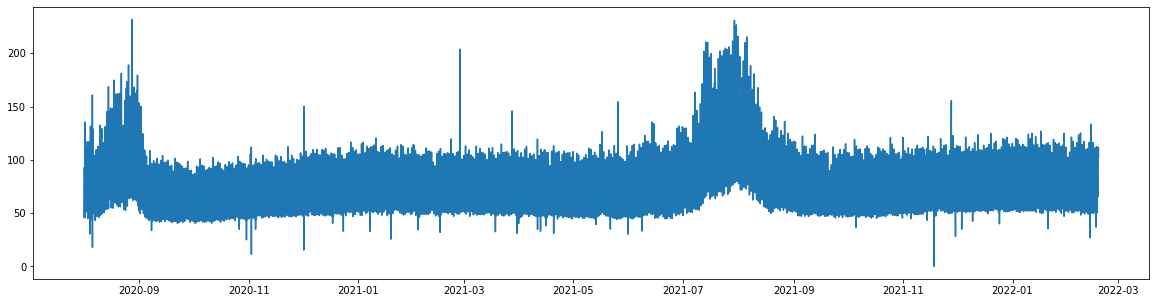

In [73]:
df_1h = df.sum(axis=1)
plt.figure(figsize=(20,5))
plt.plot(df_1h)

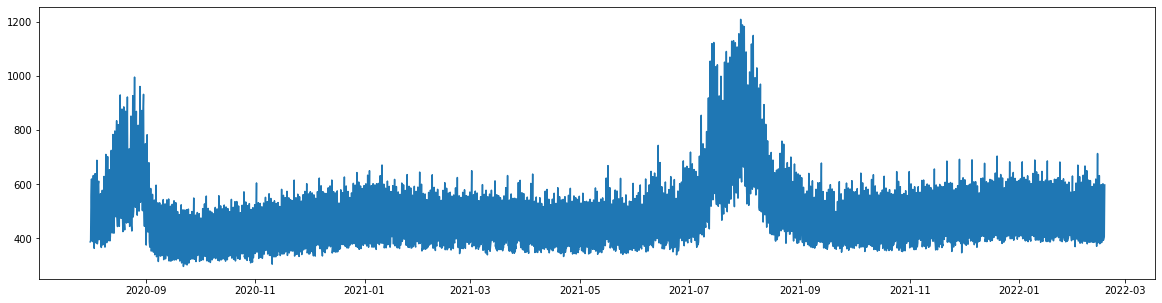

In [75]:
df_6h = df_6h.sum(axis=1)
plt.figure(figsize=(20,5))
plt.plot(df_6h)

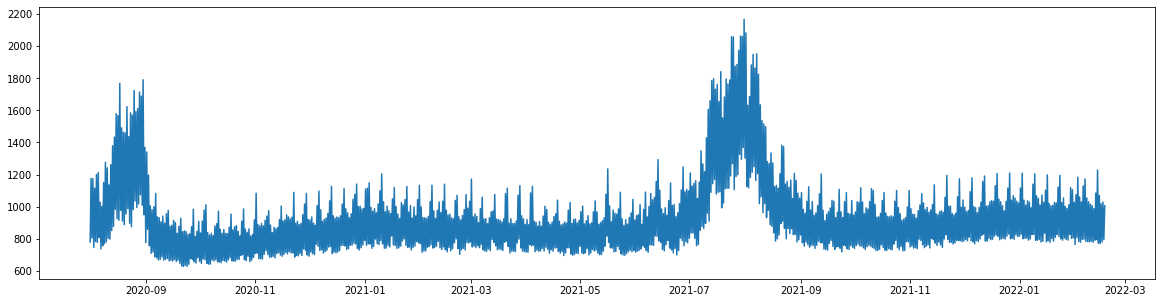

In [74]:
df_12h = df_12h.sum(axis=1)
plt.figure(figsize=(20,5))
plt.plot(df_12h)

In [76]:
1132/2 - 504

62.0

In [82]:
from predict import Predict

pr = Predict("water", "elec")

In [9]:
import pickle

for cl_method in ['kmedoids', 'kmeans', 'agglomerative', 'gmm']: 
    print(f'[{cl_method}]')
    with open(f'exp_result/{cl_method}/rf/tae_0.pkl', 'rb') as f:
        tae = pickle.load(f)
    for i in tae:
        print(f"{i}: {tae[i].mean()['4종 유추']}")
    print()

[kmedoids]
water_elec: 29.7258
water_gas: 1.3728
water_hotwater: 1.5635999999999999
gas_elec: 24.2892
gas_water: 2.202
gas_hotwater: 1.3978
hotwater_elec: 25.065600000000003
hotwater_water: 1.3578
hotwater_gas: 2.2776

[kmeans]
water_elec: 29.7258
water_gas: 1.3728
water_hotwater: 1.5635999999999999
gas_elec: 24.2892
gas_water: 2.202
gas_hotwater: 1.3978
hotwater_elec: 25.065600000000003
hotwater_water: 1.3578
hotwater_gas: 2.2776

[agglomerative]
water_elec: 29.7258
water_gas: 1.3728
water_hotwater: 1.5635999999999999
gas_elec: 24.2892
gas_water: 2.202
gas_hotwater: 1.3978
hotwater_elec: 25.065600000000003
hotwater_water: 1.3578
hotwater_gas: 2.2776

[gmm]
water_elec: 29.7258
water_gas: 1.3728
water_hotwater: 1.5635999999999999
gas_elec: 24.2892
gas_water: 2.202
gas_hotwater: 1.3978
hotwater_elec: 25.065600000000003
hotwater_water: 1.3578
hotwater_gas: 2.2776



In [19]:
for cl_method in ['kmedoids', 'kmeans', 'agglomerative', 'gmm']: 
    print(f'[{cl_method}]')
    with open(f'exp_result/{cl_method}/rf/rae_0.pkl', 'rb') as f:
        gae = pickle.load(f)
    for i in tae:
        print(f"{i}: {gae[i][0].mean()['4종 유추']}")
    print()

[kmedoids]
water_elec: 29.360400000000006
water_gas: 1.3474
water_hotwater: 1.5397999999999998
gas_elec: 24.784
gas_water: 2.3508
gas_hotwater: 1.387
hotwater_elec: 25.287200000000002
hotwater_water: 1.3406
hotwater_gas: 2.3096

[kmeans]
water_elec: 29.6182
water_gas: 1.3868
water_hotwater: 1.5326
gas_elec: 23.941200000000002
gas_water: 2.2148000000000003
gas_hotwater: 1.3884
hotwater_elec: 26.362000000000002
hotwater_water: 1.375
hotwater_gas: 2.275

[agglomerative]
water_elec: 29.583799999999997
water_gas: 1.3912
water_hotwater: 1.5466000000000002
gas_elec: 25.3478
gas_water: 2.2636
gas_hotwater: 1.3872
hotwater_elec: 26.2498
hotwater_water: 1.3356000000000001
hotwater_gas: 2.3028

[gmm]
water_elec: 29.962800000000005
water_gas: 1.3884
water_hotwater: 1.5379999999999998
gas_elec: 24.5582
gas_water: 2.2228000000000003
gas_hotwater: 1.408
hotwater_elec: 25.001600000000003
hotwater_water: 1.3388
hotwater_gas: 2.256



In [17]:
gae[i][0]

,4종 유추,4종 랜덤,4종 실제,3종
Week 1~4,30.843,32.394,33.409,34.233
Week 2~5,28.142,34.026,30.281,28.876
Week 3~6,28.173,27.295,28.164,29.12
Week 4~7,33.905,30.725,30.67,30.651
Week 5~8,26.988,28.454,31.398,28.486


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/root/workspace/AMI/InferProj/hidden/gae_gas/h_r_cluster_12H_101.csv', index_col=0)
df

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,7158,7159,7160,7161,7162,7163,7164,7165,7166,7167
0,901-1001,-0.051183,-0.270542,-0.041497,0.014157,0.098002,-0.092943,0.010324,0.393062,-0.002745,...,0.022441,0.137428,-0.123761,0.149226,-0.071320,-0.106490,-0.388672,-0.475311,0.047221,0.129842
1,901-1002,0.031402,-0.111892,0.101960,0.037157,0.120372,-0.102061,-0.018551,0.396026,0.040114,...,0.042212,0.026839,-0.163467,0.155628,-0.116228,-0.064123,-0.476587,-0.531582,0.279362,0.136808
2,901-1003,0.044748,-0.056677,0.176563,0.037138,0.068321,-0.092744,0.074158,0.417926,0.102720,...,-0.026067,-0.008563,0.596724,0.302535,-0.027426,-0.099038,-0.378594,-0.301175,0.298297,0.047228
3,901-101,0.044051,-0.123490,0.085168,0.034658,0.133727,-0.093787,-0.098602,0.366096,0.030754,...,0.059531,0.030245,0.587839,0.265154,-0.111521,-0.038617,-0.614237,-0.477055,0.219658,0.098545
4,901-102,0.020774,-0.135317,0.082257,0.031902,0.168413,-0.110566,-0.196652,0.344748,-0.014394,...,0.029582,0.032188,0.667774,0.248853,-0.049124,0.019772,-0.543074,-0.514503,0.255473,0.033983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,914-802,0.039782,-0.136981,0.085318,0.043616,0.148284,-0.127809,0.122527,0.447925,0.019409,...,0.115533,-0.004292,0.082662,0.113496,-0.216101,-0.012080,-0.326935,-0.454502,0.290720,0.150182
1076,914-803,0.043635,-0.089151,0.120700,0.041366,0.105035,-0.098074,0.056531,0.410380,0.063076,...,0.019216,-0.026727,0.184421,0.197291,-0.244055,-0.104553,-0.379664,-0.454425,0.279181,0.170778
1077,914-901,0.002911,-0.181835,0.080903,0.028880,0.100975,-0.089533,-0.036462,0.345228,0.026372,...,-0.042437,0.065752,0.593787,0.608479,-0.010237,-0.143504,-0.510422,-0.436273,0.233708,0.096017
1078,914-902,0.061287,-0.127097,0.085943,0.037618,0.137279,-0.092269,-0.087748,0.360220,0.034400,...,0.160798,-0.000645,0.207067,0.280314,-0.157468,0.067269,-0.433636,-0.547180,0.199105,0.034364


emb shape: (1080, 7168)
ex_raw shape: (13584, 1080)
ex_ts shape: (1080, 13584)
[RESULT] mean |EX diff| - kNN: -1.4296
[RESULT] mean |EX diff| - random: -1.4003
[RESULT] paired t-test (random - kNN): t=2.3623, p=1.8339e-02


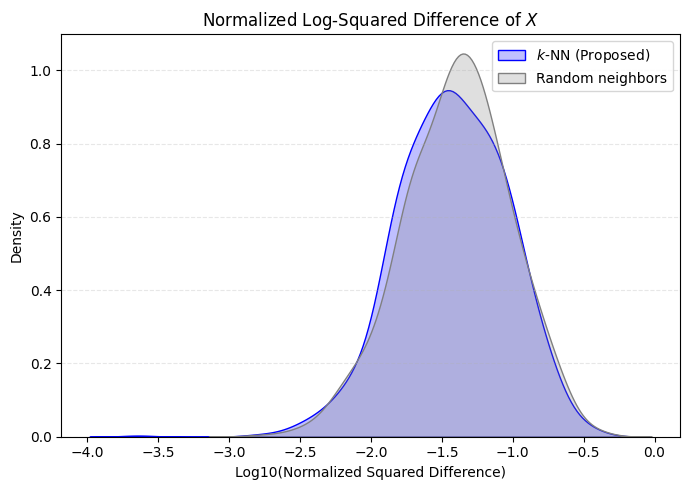

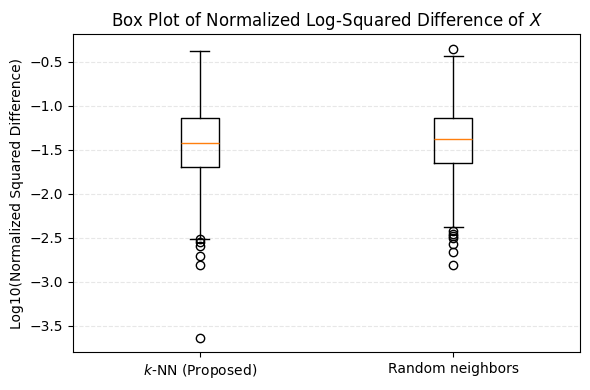

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr, spearmanr, ttest_rel

# UMAP은 선택사항
try:
    import umap
    HAS_UMAP = True
except ImportError:
    HAS_UMAP = False


########################################
# 0. 데이터 로딩 유틸
########################################

def load_region_info(path_region_info: str | None = None) -> pd.Series | None:
    """
    (선택) household -> region 매핑 로드.
    csv 예시:
        household_id,region
        h1,RegionA
        h2,RegionB
    """
    if path_region_info is None:
        return None
    df = pd.read_csv(path_region_info)
    df = df.set_index("household_id")["region"]
    return df

########################################
# 3. k-NN 이웃 vs 랜덤 이웃 Ex 차이 비교
########################################

def knn_vs_random_ex_difference(
    emb: pd.DataFrame,
    ex_ts: pd.DataFrame,
    k: int = 5,
    metric: str = "euclidean",
    random_state: int = 42,
):
    """
    각 가구에 대해:
        - 임베딩 공간에서 k-NN 이웃들의 Ex 차이 평균
        - 랜덤 k 이웃들의 Ex 차이 평균
    를 비교해서 임베딩이 실제 Ex 유사성을 반영하는지 테스트.

    Ex 차이는 여기서는 mean_abs_diff 기준 사용.
    """
    common_ids = emb.index.intersection(ex_ts.index)
    emb = emb.loc[common_ids]
    ex_ts = ex_ts.loc[common_ids]

    n = len(common_ids)
    print(f"[INFO] Number of households used: {n}")

    ex_mean = ex_ts.mean(axis=1).values

    # k-NN 이웃 찾기
    nn = NearestNeighbors(n_neighbors=k+1, metric=metric)  # 자기 자신 포함
    nn.fit(emb.values)
    distances, indices = nn.kneighbors(emb.values)

    rng = np.random.default_rng(random_state)

    knn_diffs = []
    rand_diffs = []

    for i in range(n):
        # k-NN (자기 자신 제외)
        neighbors = indices[i][1 : k+1]
        knn_diff = np.mean(np.abs(ex_mean[i] - ex_mean[neighbors]))
        knn_diffs.append(knn_diff)

        # 랜덤 k 이웃
        cand = np.arange(n)
        cand = cand[cand != i]
        rand_neighbors = rng.choice(cand, size=k, replace=False)
        rand_diff = np.mean(np.abs(ex_mean[i] - ex_mean[rand_neighbors]))
        rand_diffs.append(rand_diff)

    knn_diffs = np.array(knn_diffs)
    rand_diffs = np.array(rand_diffs)

    # paired t-test: knn_diffs vs rand_diffs
    t_stat, p_val = ttest_rel(rand_diffs, knn_diffs)
    print(f"[RESULT] mean |EX diff| - kNN: {knn_diffs.mean():.4f}")
    print(f"[RESULT] mean |EX diff| - random: {rand_diffs.mean():.4f}")
    print(f"[RESULT] paired t-test (random - kNN): t={t_stat:.4f}, p={p_val:.4e}")

    # Using squared differences to align with L2 distance logic
    knn_sq_diffs = knn_diffs**2
    rand_sq_diffs = rand_diffs**2

    # Log-transformation to handle skewness and visualize magnitude differences
    # Adding a small constant to avoid log(0)
    eps = 1e-9
    log_knn = np.log10(knn_sq_diffs + eps)
    log_rand = np.log10(rand_sq_diffs + eps)

    plt.figure(figsize=(6, 4))
    sns.kdeplot(log_knn, fill=True, label='$k$-NN neighbors (Proposed)', color='blue', bw_adjust=1.5)
    sns.kdeplot(log_rand, fill=True, label='Random neighbors', color='grey', bw_adjust=1.5)

    plt.title('Log-Squared Difference Distribution of $X$')
    plt.xlabel('Log10(Squared Difference in $E_X$)')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('figure7_log_kde.png')

    return {
        "knn_diffs": knn_diffs,
        "rand_diffs": rand_diffs,
        "t_stat": t_stat,
        "p_val": p_val,
    }

from sklearn.preprocessing import MinMaxScaler

def knn_vs_random_ex_difference_normalized(
    emb: pd.DataFrame,
    ex_ts: pd.DataFrame,
    k: int = 5,
    metric: str = "euclidean",
    random_state: int = 42,
):
    common_ids = emb.index.intersection(ex_ts.index)
    emb = emb.loc[common_ids]
    ex_ts = ex_ts.loc[common_ids]

    # --- 추가: 가구별 평균 소비량 산출 후 0~1 정규화 ---
    ex_mean = ex_ts.mean(axis=0).values.reshape(-1, 1)
    scaler = MinMaxScaler()
    ex_mean_norm = scaler.fit_transform(ex_mean).flatten()
    # ----------------------------------------------

    n = len(common_ids)
    nn = NearestNeighbors(n_neighbors=k+1, metric=metric)
    nn.fit(emb.values)
    distances, indices = nn.kneighbors(emb.values)

    rng = np.random.default_rng(random_state)
    knn_diffs = []
    rand_diffs = []

    for i in range(n):
        # k-NN (정규화된 값 기준 차이 계산)
        neighbors = indices[i][1 : k+1]
        knn_diff = np.mean((ex_mean_norm[i] - ex_mean_norm[neighbors])**2) # Squared Difference
        knn_diffs.append(knn_diff)

        # 랜덤 이웃
        cand = np.arange(n)
        cand = cand[cand != i]
        rand_neighbors = rng.choice(cand, size=k, replace=False)
        rand_diff = np.mean((ex_mean_norm[i] - ex_mean_norm[rand_neighbors])**2)
        rand_diffs.append(rand_diff)

    knn_diffs = np.array(knn_diffs)
    rand_diffs = np.array(rand_diffs)

    # Log-transformation (정규화된 값이므로 x축 범위가 -3 ~ 0 정도로 가독성 있게 나옴)
    eps = 1e-9
    log_knn = np.log10(knn_diffs + eps)
    log_rand = np.log10(rand_diffs + eps)
    
    # paired t-test: knn_diffs vs rand_diffs
    t_stat, p_val = ttest_rel(log_rand, log_knn)
    print(f"[RESULT] mean |EX diff| - kNN: {log_knn.mean():.4f}")
    print(f"[RESULT] mean |EX diff| - random: {log_rand.mean():.4f}")
    print(f"[RESULT] paired t-test (random - kNN): t={t_stat:.4f}, p={p_val:.4e}")

    # 시각화
    plt.figure(figsize=(7, 5))
    sns.kdeplot(log_knn, fill=True, label='$k$-NN (Proposed)', color='blue', bw_adjust=1.2)
    sns.kdeplot(log_rand, fill=True, label='Random neighbors', color='grey', bw_adjust=1.2)
    
    plt.title('Normalized Log-Squared Difference of $X$')
    plt.xlabel('Log10(Normalized Squared Difference)')
    plt.ylabel('Density')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('figure7_normalized_log_kde.png')
    
    # box plot 시각화
    plt.figure(figsize=(6, 4))
    data_to_plot = [log_knn, log_rand]
    plt.boxplot(data_to_plot, labels=['$k$-NN (Proposed)', 'Random neighbors'])
    plt.title('Box Plot of Normalized Log-Squared Difference of $X$')
    plt.ylabel('Log10(Normalized Squared Difference)')
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig('figure7_normalized_log_boxplot.png')

    t_stat, p_val = ttest_rel(rand_diffs, knn_diffs)
    return {"t_stat": t_stat, "p_val": p_val}

########################################
# 5. 전체 파이프라인 예시 main
########################################

if __name__ == "__main__":
    # 파일 경로 설정 (여기만 네 환경에 맞게 수정)
    PATH_HIDDEN_X = "/root/workspace/AMI/InferProj/hidden/gae_gas/h_r_cluster_12H_101.csv"      # Ex 임베딩
    PATH_EX_TS = "/root/workspace/AMI/InferProj/data/gas_clustering_total.csv"        # 실제 Ex 시계열
    PATH_REGION_INFO = None             # 예: "region_info.csv"

    # 1) 임베딩: (1080, 7168)
    emb = pd.read_csv(PATH_HIDDEN_X, index_col=0)  # <- 이미 (household, dim) 구조라고 가정

    # 2) 원본 Ex 시계열: (13584, 1080)
    ex_raw = pd.read_csv(PATH_EX_TS, index_col=0)  # (time, household)
    ex_raw.index = pd.to_datetime(ex_raw.index)
    # ex_raw = ex_raw.resample("12H").sum()  # 12시간 단위 합계

    print("emb shape:", emb.shape)      # (1080, 7168)
    print("ex_raw shape:", ex_raw.shape)  # (13584, 1080)

    # 3) 가구 기준으로 transpose: (household, time)
    if ex_raw.shape[1] == emb.shape[0]:
        ex_ts = ex_raw.T   # (1080, 13584)
    else:
        # 혹시 이미 (household, time)이라면 그대로
        ex_ts = ex_raw

    # 4) index를 임베딩과 정확히 맞춰주기 (가구 순서 동일하다고 가정)
    ex_ts.index = emb.index

    print("ex_ts shape:", ex_ts.shape)  # (1080, T)

    region_info = load_region_info(PATH_REGION_INFO)

    # 3) k-NN vs Random neighbor Ex 차이 비교
    knn_result = knn_vs_random_ex_difference_normalized(
        emb,
        ex_ts,
        k=5,
        metric="euclidean",
        random_state=42,
    )

emb shape: (1080, 7168)
ex_raw shape: (13584, 1080)
ex_ts shape: (1080, 13584)
[INFO] Number of households used: 1080
[RESULT] mean |EX diff| - kNN: 0.0036
[RESULT] mean |EX diff| - random: 0.0042
[RESULT] paired t-test (random - kNN): t=8.4105, p=1.2794e-16


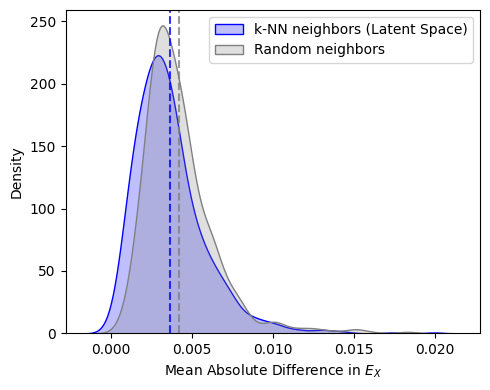

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from scipy.stats import pearsonr, spearmanr, ttest_rel

# UMAP은 선택사항
try:
    import umap
    HAS_UMAP = True
except ImportError:
    HAS_UMAP = False


########################################
# 0. 데이터 로딩 유틸
########################################

def load_region_info(path_region_info: str | None = None) -> pd.Series | None:
    """
    (선택) household -> region 매핑 로드.
    csv 예시:
        household_id,region
        h1,RegionA
        h2,RegionB
    """
    if path_region_info is None:
        return None
    df = pd.read_csv(path_region_info)
    df = df.set_index("household_id")["region"]
    return df

########################################
# 3. k-NN 이웃 vs 랜덤 이웃 Ex 차이 비교
########################################

def knn_vs_random_ex_difference(
    emb: pd.DataFrame,
    ex_ts: pd.DataFrame,
    k: int = 5,
    metric: str = "euclidean",
    random_state: int = 42,
):
    """
    각 가구에 대해:
        - 임베딩 공간에서 k-NN 이웃들의 Ex 차이 평균
        - 랜덤 k 이웃들의 Ex 차이 평균
    를 비교해서 임베딩이 실제 Ex 유사성을 반영하는지 테스트.

    Ex 차이는 여기서는 mean_abs_diff 기준 사용.
    """
    common_ids = emb.index.intersection(ex_ts.index)
    emb = emb.loc[common_ids]
    ex_ts = ex_ts.loc[common_ids]

    n = len(common_ids)
    print(f"[INFO] Number of households used: {n}")

    ex_mean = ex_ts.mean(axis=1).values

    # k-NN 이웃 찾기
    nn = NearestNeighbors(n_neighbors=k+1, metric=metric)  # 자기 자신 포함
    nn.fit(emb.values)
    distances, indices = nn.kneighbors(emb.values)

    rng = np.random.default_rng(random_state)

    knn_diffs = []
    rand_diffs = []

    for i in range(n):
        # k-NN (자기 자신 제외)
        neighbors = indices[i][1 : k+1]
        knn_diff = np.mean(np.abs(ex_mean[i] - ex_mean[neighbors]))
        knn_diffs.append(knn_diff)

        # 랜덤 k 이웃
        cand = np.arange(n)
        cand = cand[cand != i]
        rand_neighbors = rng.choice(cand, size=k, replace=False)
        rand_diff = np.mean(np.abs(ex_mean[i] - ex_mean[rand_neighbors]))
        rand_diffs.append(rand_diff)

    knn_diffs = np.array(knn_diffs)
    rand_diffs = np.array(rand_diffs)

    # paired t-test: knn_diffs vs rand_diffs
    t_stat, p_val = ttest_rel(rand_diffs, knn_diffs)
    print(f"[RESULT] mean |EX diff| - kNN: {knn_diffs.mean():.4f}")
    print(f"[RESULT] mean |EX diff| - random: {rand_diffs.mean():.4f}")
    print(f"[RESULT] paired t-test (random - kNN): t={t_stat:.4f}, p={p_val:.4e}")

    # 박스플롯/바플롯
    # plt.figure(figsize=(4, 5))
    # plt.boxplot([knn_diffs, rand_diffs],
    #             labels=["kNN neighbors", "Random neighbors"], )
    # plt.ylabel("Mean |mean(EX_i) - mean(EX_j)|")
    # plt.title("EX difference: kNN vs Random neighbors")
    # plt.tight_layout()
    # plt.show()
    
    plt.figure(figsize=(5, 4))
    sns.kdeplot(knn_diffs, fill=True, label='k-NN neighbors (Latent Space)', color='blue')
    sns.kdeplot(rand_diffs, fill=True, label='Random neighbors', color='grey')

    plt.axvline(np.mean(knn_diffs), color='blue', linestyle='--', alpha=0.8)
    plt.axvline(np.mean(rand_diffs), color='grey', linestyle='--', alpha=0.8)

    # plt.title('Distribution of Actual EX Differences: k-NN vs. Random')
    plt.xlabel('Mean Absolute Difference in $E_X$')
    plt.ylabel('Density')
    # plt.xlim([0,0.015])
    plt.legend()
    plt.tight_layout()
    plt.show()

    return {
        "knn_diffs": knn_diffs,
        "rand_diffs": rand_diffs,
        "t_stat": t_stat,
        "p_val": p_val,
    }

########################################
# 5. 전체 파이프라인 예시 main
########################################

if __name__ == "__main__":
    # 파일 경로 설정 (여기만 네 환경에 맞게 수정)
    PATH_HIDDEN_X = "/root/workspace/AMI/InferProj/hidden/gae_gas/h_r_cluster_12H_101.csv"      # Ex 임베딩
    PATH_EX_TS = "/root/workspace/AMI/InferProj/data/gas_clustering_total.csv"        # 실제 Ex 시계열
    PATH_REGION_INFO = None             # 예: "region_info.csv"

    # 1) 임베딩: (1080, 7168)
    emb = pd.read_csv(PATH_HIDDEN_X, index_col=0)  # <- 이미 (household, dim) 구조라고 가정

    # 2) 원본 Ex 시계열: (13584, 1080)
    ex_raw = pd.read_csv(PATH_EX_TS, index_col=0)  # (time, household)
    ex_raw.index = pd.to_datetime(ex_raw.index)
    # ex_raw = ex_raw.resample("12H").sum()  # 12시간 단위 합계
    # ex_min = ex_raw.min(axis=0)
    # ex_max = ex_raw.max(axis=0)
    # ex_raw = (ex_raw - ex_min) / (ex_max - ex_min + 1e-9)  # 가구별 0~1 정규화

    print("emb shape:", emb.shape)      # (1080, 7168)
    print("ex_raw shape:", ex_raw.shape)  # (13584, 1080)

    # 3) 가구 기준으로 transpose: (household, time)
    if ex_raw.shape[1] == emb.shape[0]:
        ex_ts = ex_raw.T   # (1080, 13584)
    else:
        # 혹시 이미 (household, time)이라면 그대로
        ex_ts = ex_raw

    # 4) index를 임베딩과 정확히 맞춰주기 (가구 순서 동일하다고 가정)
    ex_ts.index = emb.index

    print("ex_ts shape:", ex_ts.shape)  # (1080, T)

    region_info = load_region_info(PATH_REGION_INFO)

    # 3) k-NN vs Random neighbor Ex 차이 비교
    knn_result = knn_vs_random_ex_difference(
        emb,
        ex_ts,
        k=5,
        metric="euclidean",
        random_state=42,
    )

[INFO] households used: 1080, time length: 13584
[INFO] PCA fitted: n_components=100, explained_var_ratio_sum=0.352

[RMSE metric]
Pearson r = 0.0460 (p = 8.58e-25)
Spearman r = -0.0549 (p = 1.23e-34)


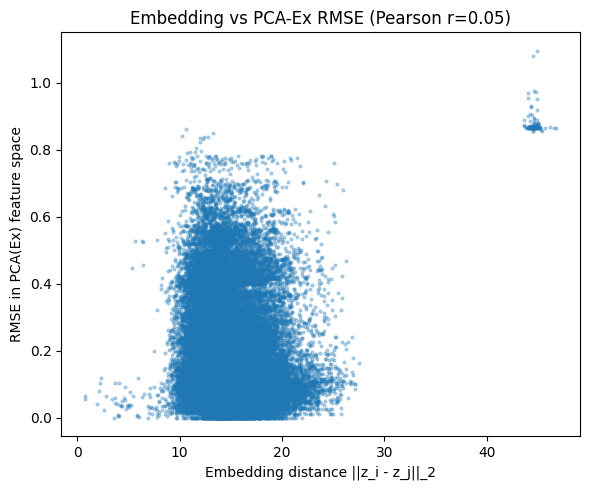


[MAE metric]
Pearson r = -0.0486 (p = 1.60e-27)
Spearman r = -0.0682 (p = 1.29e-52)


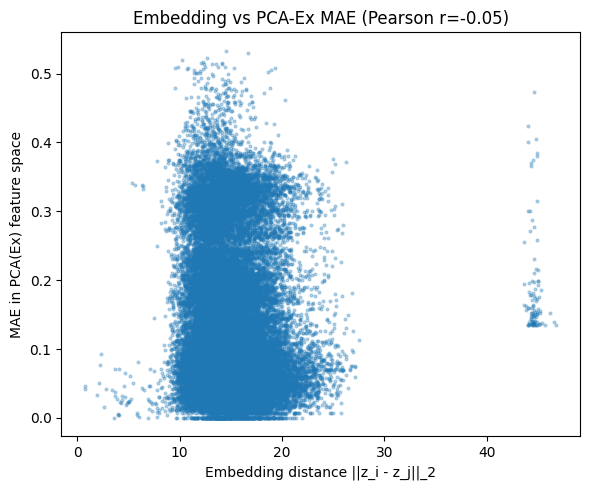


[SUMMARY] {'rmse': {'pearson_r': 0.045954883389407924, 'pearson_p': 8.583347313175803e-25, 'spearman_r': -0.05485556245503897, 'spearman_p': 1.2337287043794787e-34}, 'mae': {'pearson_r': -0.04858594001482181, 'pearson_p': 1.5968478652797543e-27, 'spearman_r': -0.06819239536271436, 'spearman_p': 1.2948453008220363e-52}}


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy.stats import pearsonr, spearmanr


def align_ex_timeseries_to_embeddings(emb: pd.DataFrame,
                                      ex_raw: pd.DataFrame) -> pd.DataFrame:
    """
    emb: (N_households, dim)
    ex_raw: (T, N_households) 또는 (N_households, T)

    반환: (N_households, T) 형태의 DataFrame, index는 emb.index와 동일
    """
    N = emb.shape[0]

    # row = household 인지, col = household 인지 자동 판별
    if ex_raw.shape[0] == N:
        ex_ts = ex_raw.copy()
    elif ex_raw.shape[1] == N:
        ex_ts = ex_raw.T
    else:
        raise ValueError(
            f"Cannot align: emb has {N} households, "
            f"but ex_raw shape is {ex_raw.shape}"
        )

    # index를 emb와 동일하게 맞추기 (순서 emb 기준)
    ex_ts.index = emb.index
    return ex_ts


def sample_pairs(n: int, max_pairs: int = 50_000, random_state: int = 42):
    """
    0..n-1 에서 (i, j), i<j 쌍을 max_pairs개 샘플링.
    """
    rng = np.random.default_rng(random_state)
    total_pairs = n * (n - 1) // 2

    if max_pairs >= total_pairs:
        pairs = []
        for i in range(n):
            for j in range(i + 1, n):
                pairs.append((i, j))
        return pairs

    pairs = set()
    while len(pairs) < max_pairs:
        i = rng.integers(0, n)
        j = rng.integers(0, n)
        if i >= j:
            continue
        pairs.add((i, j))
    return list(pairs)


def correlation_analysis_all_metrics(
    emb: pd.DataFrame,
    ex_raw: pd.DataFrame,
    n_components: int = 10,
    max_pairs: int = 50_000,
    random_state: int = 42,
    save_prefix: str | None = None,
):
    """
    기존 correlation_analysis_all_metrics를 대체하는 버전.

    1) EX 시계열을 (가구, 시간)으로 정렬
    2) PCA로 차원축소하여 EX feature (N, n_components) 생성
    3) 임베딩 거리 vs EX feature RMSE / MAE 상관 분석 및 scatter plot

    반환: dict {
        'rmse': {pearson_r, pearson_p, spearman_r, spearman_p},
        'mae' : {...}
    }
    """
    # 1. EX 정렬
    ex_ts = align_ex_timeseries_to_embeddings(emb, ex_raw)
    N = emb.shape[0]
    print(f"[INFO] households used: {N}, time length: {ex_ts.shape[1]}")

    # 2. PCA 기반 EX feature
    pca = PCA(n_components=n_components, random_state=random_state)
    ex_feat = pca.fit_transform(ex_ts.values)   # (N, n_components)
    print(f"[INFO] PCA fitted: n_components={n_components}, "
          f"explained_var_ratio_sum={pca.explained_variance_ratio_.sum():.3f}")

    Z = emb.values        # (N, d_embed)
    F = ex_feat           # (N, d_feat)

    # 3. pair 샘플링
    pairs = sample_pairs(N, max_pairs=max_pairs, random_state=random_state)

    d_emb = []
    d_rmse = []
    d_mae = []

    for i, j in pairs:
        # embedding L2 distance
        diff_emb = Z[i] - Z[j]
        d_e = np.linalg.norm(diff_emb, ord=2)
        d_emb.append(d_e)

        # EX feature distance
        diff_f = F[i] - F[j]
        rmse = np.sqrt(np.mean(diff_f**2))
        mae = np.mean(np.abs(diff_f))

        d_rmse.append(rmse)
        d_mae.append(mae)

    d_emb = np.array(d_emb)
    d_rmse = np.array(d_rmse)
    d_mae = np.array(d_mae)

    # 안전장치
    if len(d_emb) < 2:
        print("[WARN] Not enough pairs for correlation.")
        return None

    results = {}

    # ---------- RMSE ----------
    pearson_r, pearson_p = pearsonr(d_emb, d_rmse)
    spearman_r, spearman_p = spearmanr(d_emb, d_rmse)
    results["rmse"] = {
        "pearson_r": pearson_r,
        "pearson_p": pearson_p,
        "spearman_r": spearman_r,
        "spearman_p": spearman_p,
    }

    print("\n[RMSE metric]")
    print(f"Pearson r = {pearson_r:.4f} (p = {pearson_p:.2e})")
    print(f"Spearman r = {spearman_r:.4f} (p = {spearman_p:.2e})")

    plt.figure(figsize=(6, 5))
    plt.scatter(d_emb, d_rmse, s=4, alpha=0.3)
    plt.xlabel("Embedding distance ||z_i - z_j||_2")
    plt.ylabel("RMSE in PCA(Ex) feature space")
    plt.title(f"Embedding vs PCA-Ex RMSE (Pearson r={pearson_r:.2f})")
    plt.tight_layout()
    if save_prefix is not None:
        plt.savefig(f"{save_prefix}_rmse_scatter.png", dpi=300)
    plt.show()

    # ---------- MAE ----------
    pearson_r, pearson_p = pearsonr(d_emb, d_mae)
    spearman_r, spearman_p = spearmanr(d_emb, d_mae)
    results["mae"] = {
        "pearson_r": pearson_r,
        "pearson_p": pearson_p,
        "spearman_r": spearman_r,
        "spearman_p": spearman_p,
    }

    print("\n[MAE metric]")
    print(f"Pearson r = {pearson_r:.4f} (p = {pearson_p:.2e})")
    print(f"Spearman r = {spearman_r:.4f} (p = {spearman_p:.2e})")

    plt.figure(figsize=(6, 5))
    plt.scatter(d_emb, d_mae, s=4, alpha=0.3)
    plt.xlabel("Embedding distance ||z_i - z_j||_2")
    plt.ylabel("MAE in PCA(Ex) feature space")
    plt.title(f"Embedding vs PCA-Ex MAE (Pearson r={pearson_r:.2f})")
    plt.tight_layout()
    if save_prefix is not None:
        plt.savefig(f"{save_prefix}_mae_scatter.png", dpi=300)
    plt.show()

    return results


# ---------------- 사용 예시 ----------------
if __name__ == "__main__":
    # 네 환경에 맞게 파일 경로만 수정하면 됨
    
    res = correlation_analysis_all_metrics(
        emb,
        ex_raw,
        n_components=100,      # PCA 차원 (원하는 대로 조정)
        max_pairs=50_000,
        random_state=42,
        save_prefix="ex_corr_pca"
    )

    print("\n[SUMMARY]", res)


In [24]:
train = pd.read_csv('/root/workspace/AMI/InferProj/data/hotwater_clustering_train.csv', index_col=0)
test = pd.read_csv('/root/workspace/AMI/InferProj/data/hotwater_clustering_test.csv', index_col=0)
total = pd.concat([train, test], axis=1)
total.to_csv('/root/workspace/AMI/InferProj/data/hotwater_clustering_total.csv')

In [21]:
pd.concat([pd.read_csv('/root/workspace/AMI/InferProj/exp_result/gas_cluster_3.csv', index_col=0),
pd.read_csv('/root/workspace/AMI/InferProj/exp_result/gas_cluster_4.csv', index_col=0),
pd.read_csv('/root/workspace/AMI/InferProj/exp_result/gas_cluster_5.csv', index_col=0),
pd.read_csv('/root/workspace/AMI/InferProj/exp_result/gas_cluster_6.csv', index_col=0),
pd.read_csv('/root/workspace/AMI/InferProj/exp_result/gas_cluster_7.csv', index_col=0)])

,kmedoids,kmeans,agglomerative,gmm
RAE,0.067228,0.067015,0.067178,0.067903
GAE,0.067410,0.065911,0.066121,0.066381
TAE,0.067662,0.066865,0.067264,0.068265
RAE,0.066966,0.066973,0.067200,0.067578
GAE,0.066303,0.066313,0.066146,0.066152
TAE,0.067328,0.066960,0.067285,0.068073
RAE,0.066709,0.066654,0.067133,0.066812
GAE,0.066400,0.066356,0.066139,0.066093
TAE,0.066999,0.066547,0.067191,0.068202
RAE,0.066802,0.066376,0.067078,0.066607


In [30]:
200 * 25.5 / 60

85.0